In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import expon

%matplotlib inline

In [5]:
def fexp2p(x, a, b):
    return a * np.exp(b * x)

def fexp3p(x, a, b, c):
    return a * np.exp(b * x) + c

def fexp4p(x, a, b, c, d):
    return a * np.exp(b * (x - c)) + d

def goodness_of_fit(f, x, y, popt, pcov=None):
    print('parameters: ', popt)
    if pcov is not None:
        print('covariance: ', pcov)
        perr = np.sqrt(np.diag(pcov))
        print(perr, '\n')

    # residual sum of squares (ss_res)
    residuals = y - f(x, *popt)
    ss_res = np.sum(residuals**2)
    # total sum of squares (ss_tot)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('R**2 = ', r_squared) 
    return r_squared

In [6]:
fname = r'H:\LSGB\20220503_Mar_Menor\data\qhalbujon.csv'

y = np.genfromtxt(fname, delimiter=',', dtype=np.float64, autostrip=True, skip_header=1)
print(y[0:5])
x = np.arange(len(y))
print(x[0:5])

[13.7698 10.1962  8.2206  6.6732  5.2666]
[0 1 2 3 4]


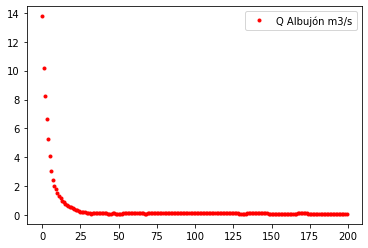

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r.', label='Q Albujón m3/s')
ax.legend()

In [24]:
f = fexp3p
popt, pcov = curve_fit(f, x, y) 
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [-6.36412725e-13  9.99999998e-01 -1.05877936e+62]
R**2 =  -7.430524260701697e+145


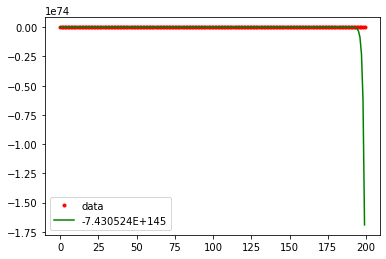

In [32]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r.', label='data')
ax.plot(x, f(x, *popt), 'g-', label=f'{rsq:2E}')
ax.legend()